## Derrick Harden

## AI 240 Machine Learning

## Instructor - Dr. Uma Gajendragadkar

# Predicting Developer Task Success Rate with Linear Regression Algorithm
### A regression model to predict developer task success rate using eleven independent factors.


## Import libraries

In [23]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Import data

In [24]:
# Load the dataset
df = pd.read_csv("AI_Developer_Performance_Extended_1000.csv")

In [25]:
# Display top five rows
df.head()

,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Task_Success_Rate,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors
0,7,416,9,7,6,5.9,92,34,7,99,10.5,20,3
1,4,269,16,13,5,5.1,85,36,2,100,9.5,17,8
2,11,439,3,0,2,6.2,38,79,2,55,18.3,35,2
3,8,472,15,9,4,4.2,26,94,5,30,12.6,28,4
4,5,265,19,16,5,8.1,82,33,6,82,7.0,25,9


In [26]:
# Display bottom 5 rows
df.tail()

,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Task_Success_Rate,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors
995,10,660,14,13,0,5.5,21,80,2,30,5.2,20,5
996,9,484,13,11,1,8.8,34,78,0,39,4.7,37,1
997,2,128,4,0,3,8.7,42,74,3,49,2.8,5,7
998,8,266,5,3,1,5.7,48,51,0,63,11.8,9,0
999,8,604,16,15,3,6.9,26,90,4,30,4.4,11,1


## Preprocessing

In [27]:
# Describe the data
df.describe()

,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Task_Success_Rate,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors
count,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.84000,356.23400,9.876000,7.153000,2.961000,6.465800,56.933000,56.578000,3.368000,66.410000,8.700100,17.253000,4.544000
std,3.15854,188.15535,5.796052,5.468226,2.021278,1.439529,21.767506,20.814879,2.342234,21.865452,5.992891,10.836901,2.820997
min,1.00000,26.00000,0.000000,0.000000,0.000000,4.000000,20.000000,30.000000,0.000000,30.000000,0.500000,1.000000,0.000000
25%,3.00000,209.50000,5.000000,2.000000,1.000000,5.200000,38.000000,37.000000,1.000000,48.000000,4.000000,9.000000,2.000000
50%,6.00000,332.00000,10.000000,7.000000,3.000000,6.400000,57.000000,55.500000,3.000000,66.000000,7.450000,14.000000,5.000000
75%,9.00000,480.50000,15.000000,12.000000,5.000000,7.700000,76.000000,74.000000,5.000000,86.000000,12.000000,23.000000,7.000000
max,11.00000,993.00000,19.000000,19.000000,6.000000,9.000000,94.000000,100.000000,7.000000,100.000000,27.500000,50.000000,9.000000


In [28]:
# Summmarize data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hours_Coding         1000 non-null   int64  
 1   Lines_of_Code        1000 non-null   int64  
 2   Bugs_Found           1000 non-null   int64  
 3   Bugs_Fixed           1000 non-null   int64  
 4   AI_Usage_Hours       1000 non-null   int64  
 5   Sleep_Hours          1000 non-null   float64
 6   Cognitive_Load       1000 non-null   int64  
 7   Task_Success_Rate    1000 non-null   int64  
 8   Coffee_Intake        1000 non-null   int64  
 9   Stress_Level         1000 non-null   int64  
 10  Task_Duration_Hours  1000 non-null   float64
 11  Commits              1000 non-null   int64  
 12  Errors               1000 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 101.7 KB


In [29]:
# Discover the zero values in each column
df.eq(0).sum()

Hours_Coding             0
Lines_of_Code            0
Bugs_Found              48
Bugs_Fixed             195
AI_Usage_Hours         152
Sleep_Hours              0
Cognitive_Load           0
Task_Success_Rate        0
Coffee_Intake          153
Stress_Level             0
Task_Duration_Hours      0
Commits                  0
Errors                  92
dtype: int64

## Correlation matrix

In [30]:
# Correlation matrix
df.corr()

,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Task_Success_Rate,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors
Hours_Coding,1.000000,0.811573,0.043478,0.020776,-0.004428,0.004497,-0.017627,0.019039,-0.046967,-0.011833,0.781667,0.697084,0.018316
Lines_of_Code,0.811573,1.000000,0.037246,0.019535,0.287284,-0.029719,-0.040830,0.114251,-0.018873,-0.040582,0.643505,0.619908,0.037459
Bugs_Found,0.043478,0.037246,1.000000,0.941841,-0.009299,-0.009483,-0.019957,0.014733,0.016858,-0.022062,0.016092,0.039354,-0.016257
Bugs_Fixed,0.020776,0.019535,0.941841,1.000000,-0.017301,-0.011199,-0.030088,0.019643,0.010215,-0.032682,-0.013645,0.022150,-0.042454
AI_Usage_Hours,-0.004428,0.287284,-0.009299,-0.017301,1.000000,-0.025366,-0.010479,0.246024,-0.010497,-0.025209,-0.014990,0.172278,0.035324
Sleep_Hours,0.004497,-0.029719,-0.009483,-0.011199,-0.025366,1.000000,-0.051732,0.054636,0.006824,-0.054626,-0.026187,0.036918,-0.044960
Cognitive_Load,-0.017627,-0.040830,-0.019957,-0.030088,-0.010479,-0.051732,1.000000,-0.940063,0.045130,0.968628,-0.020026,-0.008827,-0.030020
Task_Success_Rate,0.019039,0.114251,0.014733,0.019643,0.246024,0.054636,-0.940063,1.000000,-0.046909,-0.919470,0.021722,0.047376,0.036645
Coffee_Intake,-0.046967,-0.018873,0.016858,0.010215,-0.010497,0.006824,0.045130,-0.046909,1.000000,0.041282,0.001531,-0.080810,-0.030480
Stress_Level,-0.011833,-0.040582,-0.022062,-0.032682,-0.025209,-0.054626,0.968628,-0.919470,0.041282,1.000000,-0.012276,-0.008562,-0.034535


<Axes: >

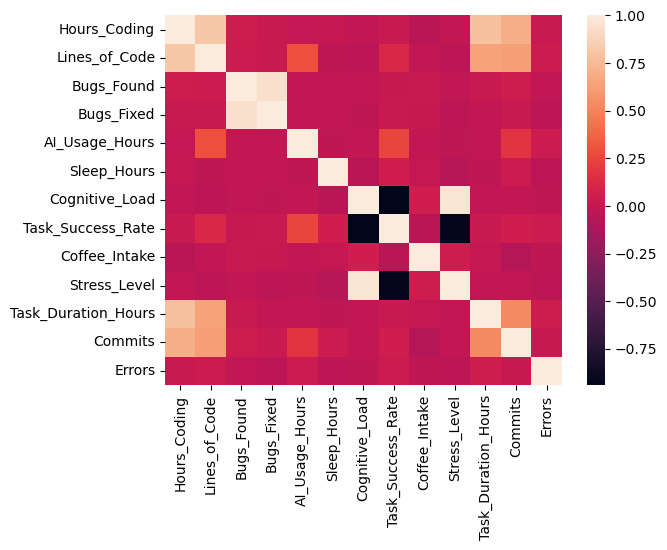

In [31]:
# Correlation matrix heatmap
sns.heatmap(df.corr())

## Distribution

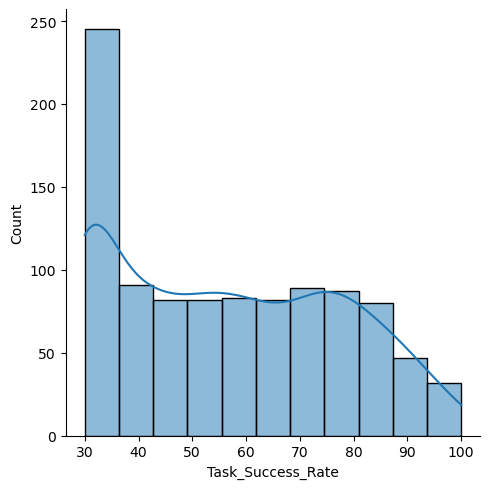

In [32]:
# Distribution of Task_Success_Rate
sns.displot(df['Task_Success_Rate'], kde=True)

## Relationships

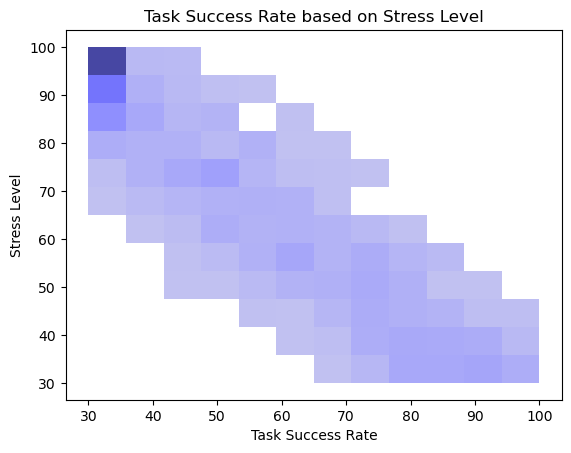

In [33]:
# Displot showing relationship between Task_Success_Rate and Stress_Level
sns.histplot(x=df['Task_Success_Rate'], y=df['Stress_Level'], kde=True, \
                bins=12, color='blue')

plt.title('Task Success Rate based on Stress Level')
plt.xlabel('Task Success Rate')
plt.ylabel('Stress Level')
plt.show()

<Axes: xlabel='Sleep_Hours', ylabel='Task_Success_Rate'>

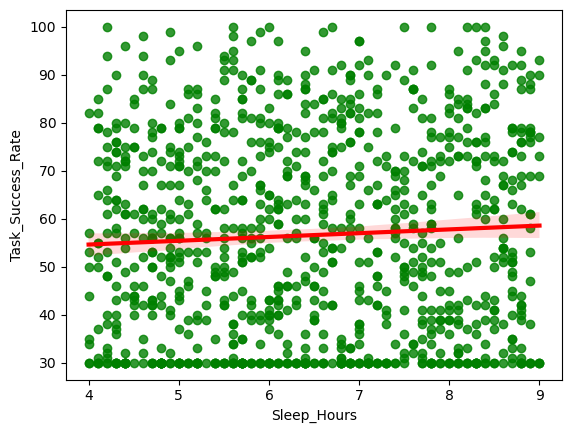

In [34]:
# Scatterplot with regression line showing relationship between Sleep_Hours and Task_Success_Rate
sns.regplot(x='Sleep_Hours', y='Task_Success_Rate', data=df,
            scatter_kws={'color': 'green'}, line_kws={'color': 'red', 'linewidth':3})

<Axes: xlabel='AI_Usage_Hours', ylabel='Task_Success_Rate'>

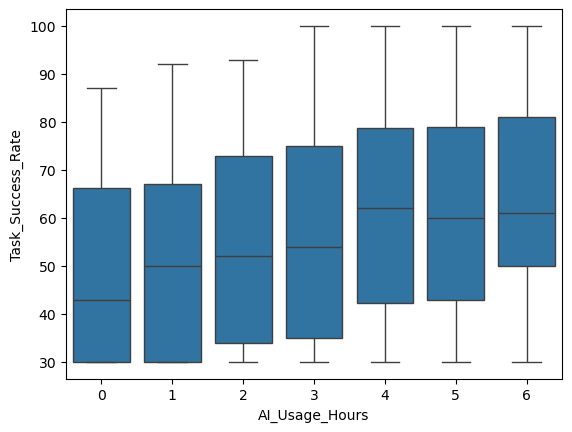

In [35]:
# Box plot showing relationship between AI_Usage_Hours and Task_Success_Rate
sns.boxplot(x='AI_Usage_Hours', y='Task_Success_Rate', data=df)

## Clean the data

In [36]:
# Drop unnecessary columns
df.drop(columns=['Bugs_Found', 'Cognitive_Load'], inplace=True)

## Split the data

In [37]:
# Seperate X (independent variables) and y (dependent variables)
X = df.drop(columns=['Task_Success_Rate'])
y = df['Task_Success_Rate']

In [38]:
# Split the data for training and testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model

In [39]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

## Make predictions

In [40]:
# Make predictions
y_pred = model.predict(X_test)

## Visualize predictions

### Training Set

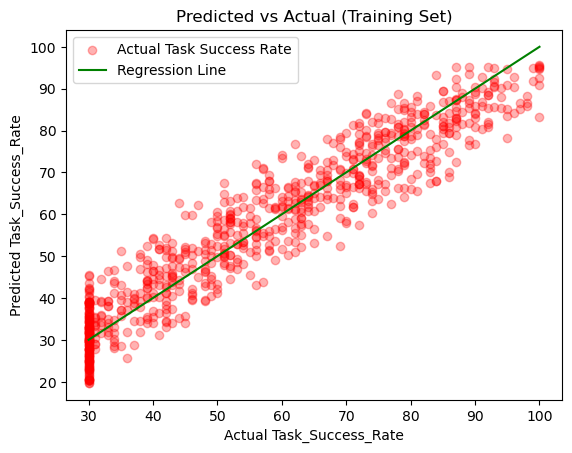

In [41]:
#  Scatter plot to show predictions on training set
plt.scatter(y_train, model.predict(X_train), alpha=0.3, color='red', label='Actual Task Success Rate') # alpha lowered to see density more clearly
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='green', label='Regression Line')
plt.xlabel('Actual Task_Success_Rate')
plt.ylabel('Predicted Task_Success_Rate')
plt.title('Predicted vs Actual (Training Set)')
plt.legend()
plt.show()

### Test set

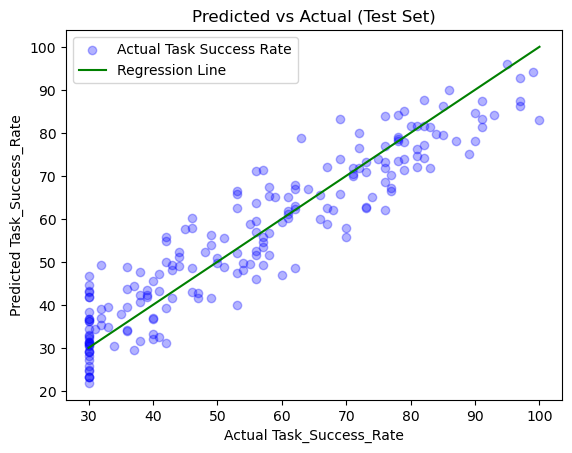

In [42]:
# Scatterplot to show predictions on test set
plt.scatter(y_test, y_pred, alpha=0.3, color='blue', label='Actual Task Success Rate')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', label='Regression Line')
plt.xlabel('Actual Task_Success_Rate')
plt.ylabel('Predicted Task_Success_Rate')
plt.title('Predicted vs Actual (Test Set)')
plt.legend()
plt.show()

## Coefficients and intercept

In [43]:
# Find the coefficients and intercept
coefficient = model.coef_
intercept = model.intercept_

# Print intercept
print("Intercept:", intercept)

# Print coefficients for each feature
for feature, coef in zip(X.columns, coefficient):
    print(f"{feature}: {coef}")

Intercept: 107.87045126230849
Hours_Coding: -0.23837616037788337
Lines_of_Code: 0.004362112616349243
Bugs_Fixed: -0.012592847439371682
AI_Usage_Hours: 2.1666120031578906
Sleep_Hours: 0.04771575248021757
Coffee_Intake: -0.09756533574929976
Stress_Level: -0.8659810945795248
Task_Duration_Hours: 0.07255696034837752
Commits: -0.029620804077971234
Errors: -0.07748520587112752


## Evaluate model performance

In [44]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training set metrics
print("Training set:")
print("R²:", r2_score(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))

# Test set metrics
print("\nTest set:")
print("R²:", r2_score(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))

Training set:
R²: 0.9010904001124488
MSE: 43.482388555825544

Test set:
R²: 0.8708328045838083
MSE: 52.325876280770544
